## 8.2 勾配の評価

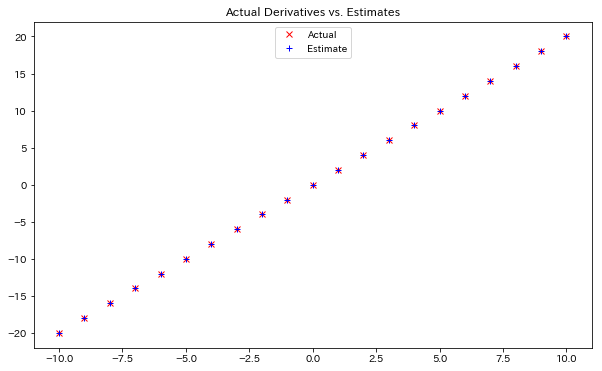

In [5]:
from scratch.linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

def main():
    xs = range(-10, 11)
    actuals = [derivative(x) for x in xs]
    estimates = [difference_quotient(square, x, h=0.001) for x in xs]
    
    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    plt.figure(figsize = (10, 6), dpi = 72)
    plt.title("Actual Derivatives vs. Estimates")
    plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
    plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
    plt.legend(loc=9)
    plt.show()
    
    
    plt.close()
    
    def partial_difference_quotient(f: Callable[[Vector], float],
                                    v: Vector,
                                    i: int,
                                    h: float) -> float:
        """Returns the i-th partial difference quotient of f at v"""
        w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
             for j, v_j in enumerate(v)]
    
        return (f(w) - f(v)) / h
    
if __name__ == "__main__": main()

In [7]:

    
def main2():
    
    # "Using the Gradient" example
    
    # pick a random starting point
    v = [random.uniform(-10, 10) for i in range(3)]
    
    for epoch in range(1000):
        grad = sum_of_squares_gradient(v)    # compute the gradient at v
        v = gradient_step(v, grad, -0.01)    # take a negative gradient step
        print(epoch, v)
    
    assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0
    
    
    # First "Using Gradient Descent to Fit Models" example
    
    from scratch.linear_algebra import vector_mean
    
    # Start with random values for slope and intercept.
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    learning_rate = 0.001
    
    for epoch in range(5000):
        # Compute the mean of the gradients
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
        # Take a step in that direction
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
    
    # Minibatch gradient descent example
    
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    for epoch in range(1000):
        for batch in minibatches(inputs, batch_size=20):
            grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
            theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
    
    # Stochastic gradient descent example
    
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    for epoch in range(100):
        for x, y in inputs:
            grad = linear_gradient(x, y, theta)
            theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
main2()

0 [-3.7587467013202636, -6.190698707861535, 6.405964035276382]
1 [-3.6835717672938584, -6.066884733704304, 6.277844754570854]
2 [-3.609900331947981, -5.9455470390302185, 6.152287859479436]
3 [-3.5377023253090214, -5.826636098249614, 6.029242102289848]
4 [-3.466948278802841, -5.710103376284622, 5.908657260244051]
5 [-3.397609313226784, -5.59590130875893, 5.79048411503917]
6 [-3.3296571269622484, -5.483983282583751, 5.674674432738387]
7 [-3.2630639844230034, -5.374303616932076, 5.5611809440836195]
8 [-3.1978027047345434, -5.266817544593435, 5.4499573252019475]
9 [-3.1338466506398523, -5.161481193701566, 5.340958178697909]
10 [-3.0711697176270554, -5.058251569827535, 5.23413901512395]
11 [-3.009746323274514, -4.957086538430984, 5.129456234821471]
12 [-2.949551396809024, -4.857944807662364, 5.026867110125042]
13 [-2.8905603688728436, -4.760785911509117, 4.926329767922541]
14 [-2.8327491614953866, -4.665570193278935, 4.8278031725640895]
15 [-2.776094178265479, -4.572258789413356, 4.73124710

283 [19.99828271914353, 2.140726342572947]
284 [19.99828615267384, 2.1464431726069444]
285 [19.998289579339158, 2.1521485724144043]
286 [19.998292999153197, 2.157842564848915]
287 [19.998296412129665, 2.16352517271837]
288 [19.99829981828223, 2.169196418785063]
289 [19.99830321762454, 2.174856325765775]
290 [19.9983066101702, 2.1805049163318677]
291 [19.998309995932807, 2.186142213109374]
292 [19.998313374925928, 2.191768238679088]
293 [19.998316747163084, 2.197383015576656]
294 [19.9983201126578, 2.2029865662926658]
295 [19.99832347142354, 2.208578913272738]
296 [19.99832682347377, 2.214160078917616]
297 [19.998330168821912, 2.2197300855832545]
298 [19.998333507481366, 2.22528895558091]
299 [19.99833683946551, 2.2308367111772296]
300 [19.99834016478768, 2.236373374594341]
301 [19.998343483461213, 2.2418989680099397]
302 [19.99834679549938, 2.247413513557381]
303 [19.99835010091547, 2.2529170333257658]
304 [19.998353399722706, 2.25840954936003]
305 [19.998356691934315, 2.26389108366103

1127 [19.999682868951762, 4.471976614210846]
1128 [19.999683503023384, 4.473032343851377]
1129 [19.999684135827255, 4.474085962666697]
1130 [19.99968476736589, 4.475137474877191]
1131 [19.99968539764183, 4.476186884694802]
1132 [19.999686026657596, 4.477234196323054]
1133 [19.999686654415708, 4.478279413957066]
1134 [19.99968728091868, 4.479322541783567]
1135 [19.999687906169026, 4.480363583980918]
1136 [19.99968853016924, 4.481402544719126]
1137 [19.999689152921835, 4.482439428159857]
1138 [19.999689774429296, 4.483474238456459]
1139 [19.999690394694117, 4.484506979753975]
1140 [19.999691013718778, 4.485537656189162]
1141 [19.999691631505765, 4.486566271890502]
1142 [19.999692248057546, 4.487592830978227]
1143 [19.999692863376595, 4.488617337564328]
1144 [19.999693477465375, 4.489639795752576]
1145 [19.999694090326347, 4.490660209638536]
1146 [19.999694701961964, 4.491678583309585]
1147 [19.99969531237468, 4.492694920844928]
1148 [19.999695921566932, 4.493709226315612]
1149 [19.999696

2050 [19.999950000045786, 4.916750046202208]
2051 [19.999950100015663, 4.916916496109849]
2052 [19.999950199785662, 4.917082613217644]
2053 [19.999950299356183, 4.917248398190995]
2054 [19.999950398727616, 4.9174138516939685]
2055 [19.999950497900375, 4.917578974389309]
2056 [19.99995059687484, 4.91774376693843]
2057 [19.99995069565142, 4.917908230001427]
2058 [19.999950794230504, 4.918072364237076]
2059 [19.999950892612492, 4.918236170302832]
2060 [19.99995099079777, 4.918399648854838]
2061 [19.99995108878674, 4.918562800547926]
2062 [19.999951186579793, 4.918725626035617]
2063 [19.999951284177314, 4.918888125970126]
2064 [19.999951381579702, 4.919050301002363]
2065 [19.99995147878734, 4.919212151781938]
2066 [19.999951575800626, 4.919373678957162]
2067 [19.99995167261994, 4.919534883175048]
2068 [19.999951769245676, 4.919695765081318]
2069 [19.999951865678216, 4.919856325320401]
2070 [19.99995196191795, 4.920016564535438]
2071 [19.999952057965263, 4.9201764833682855]
2072 [19.9999521

2989 [19.999992365276864, 4.98728818139054]
2990 [19.999992380541723, 4.987313597393036]
2991 [19.999992395776065, 4.987338962578791]
2992 [19.999992410979942, 4.9873642770494095]
2993 [19.999992426153426, 4.987389540906291]
2994 [19.99999244129657, 4.987414754250632]
2995 [19.999992456409437, 4.987439917183427]
2996 [19.99999247149209, 4.9874650298054695]
2997 [19.99999248654458, 4.98749009221735]
2998 [19.999992501566982, 4.98751510451946]
2999 [19.99999251655934, 4.987540066811988]
3000 [19.99999253152173, 4.987564979194923]
3001 [19.9999925464542, 4.987589841768055]
3002 [19.999992561356816, 4.987614654630973]
3003 [19.999992576229634, 4.987639417883068]
3004 [19.99999259107272, 4.987664131623532]
3005 [19.99999260588612, 4.987688795951358]
3006 [19.999992620669907, 4.987713410965341]
3007 [19.999992635424135, 4.98773797676408]
3008 [19.999992650148865, 4.9877624934459766]
3009 [19.999992664844154, 4.987786961109234]
3010 [19.999992679510058, 4.987811379851859]
3011 [19.99999269414

3924 [19.99999882484875, 4.998043372458035]
3925 [19.999998827198343, 4.998047284537968]
3926 [19.999998829543244, 4.99805118879609]
3927 [19.999998831883453, 4.998055085248041]
3928 [19.999998834218985, 4.998058973909429]
3929 [19.999998836549846, 4.998062854795829]
3930 [19.99999883887605, 4.998066727922787]
3931 [19.9999988411976, 4.998070593305817]
3932 [19.999998843514508, 4.998074450960403]
3933 [19.999998845826784, 4.998078300901997]
3934 [19.99999884813444, 4.99808214314602]
3935 [19.999998850437475, 4.998085977707862]
3936 [19.999998852735914, 4.998089804602883]
3937 [19.999998855029748, 4.9980936238464135]
3938 [19.999998857319003, 4.998097435453751]
3939 [19.99999885960368, 4.998101239440162]
3940 [19.999998861883785, 4.998105035820886]
3941 [19.999998864159338, 4.998108824611127]
3942 [19.99999886643033, 4.998112605826064]
3943 [19.999998868696796, 4.998116379480842]
3944 [19.999998870958716, 4.998120145590577]
3945 [19.99999887321613, 4.998123904170354]
3946 [19.9999988754

4841 [19.999999812483367, 4.999687784693906]
4842 [19.999999812858288, 4.9996884089370015]
4843 [19.99999981323246, 4.999689031931986]
4844 [19.999999813605882, 4.999689653681354]
4845 [19.999999813978558, 4.999690274187597]
4846 [19.99999981435049, 4.9996908934532005]
4847 [19.999999814721676, 4.999691511480645]
4848 [19.999999815092124, 4.999692128272406]
4849 [19.999999815461827, 4.999692743830953]
4850 [19.999999815830794, 4.999693358158753]
4851 [19.99999981619902, 4.999693971258266]
4852 [19.999999816566515, 4.999694583131949]
4853 [19.999999816933265, 4.999695193782252]
4854 [19.999999817299294, 4.999695803211621]
4855 [19.999999817664584, 4.999696411422497]
4856 [19.999999818029146, 4.999697018417317]
4857 [19.999999818392975, 4.999697624198511]
4858 [19.999999818756084, 4.999698228768507]
4859 [19.99999981911846, 4.9996988321297255]
4860 [19.999999819480117, 4.999699434284585]
4861 [19.999999819841047, 4.999700035235496]
4862 [19.999999820201257, 4.999700634984866]
4863 [19.99

694 [20.00000011907758, 4.999962219111221]
695 [19.999990954504394, 4.999962679975797]
696 [19.999997666690113, 4.999963237337325]
697 [19.99999411485879, 4.9999642317481925]
698 [20.000000866377476, 4.999965794268157]
699 [19.999998717740684, 4.999966333322456]
700 [19.99999231751758, 4.99996668394331]
701 [20.000013484990408, 4.999967248276348]
702 [19.999999389717473, 4.999966755167299]
703 [20.00000534672931, 4.999967229671729]
704 [20.000002713750767, 4.999967272098433]
705 [20.00000121102846, 4.999969405871124]
706 [19.999998656197388, 4.999969461250244]
707 [19.999998711214985, 4.999969521735545]
708 [19.99999847985858, 4.999969695264787]
709 [19.999995441670055, 4.99997045596601]
710 [19.999998531499465, 4.999973040220136]
711 [19.99999868340944, 4.999973206748921]
712 [19.99998772529636, 4.9999739845149405]
713 [19.999997938700403, 4.999974651250672]
714 [20.00000370302525, 4.999974766055462]
715 [19.999999298536125, 4.999975860738513]
716 [20.000004779992707, 4.99997614576442